# CASE STUDY: FASHION CLASS CLASSIFICATION

- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

- The 10 classes are as follows:

   - 0 => T-shirt/top 
   - 1 => Trouser 
   - 2 => Pullover
   - 3 => Dress
   - 4 => Coat
   - 5 => Sandal
   - 6 => Shirt
   - 7 => Sneaker
   - 8 => Bag
   - 9 => Ankle boot
   

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- Each pixel has a single pixelvalue associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
- This pixel value is an integer between 0 and 255. 



# STEP #2: IMPORTING DATA

In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random


In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('C:/Users/phani/python files/projects/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('C:/Users/phani/python files/projects/fashion-mnist_test.csv', sep = ',')

# STEP #3: VISUALIZATION OF THE DATASET

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [9]:
training.shape

(60000, 785)

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

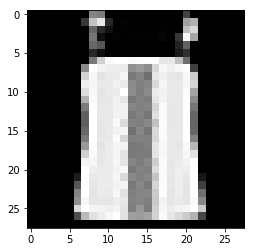

In [12]:
i = random.randint(1,60000) 
plt.imshow( training[i,1:].reshape((28,28))) 

plt.imshow( training[i,1:].reshape((28,28)), cmap = 'gray') 

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [13]:
label = training[i,0]
label


0.0

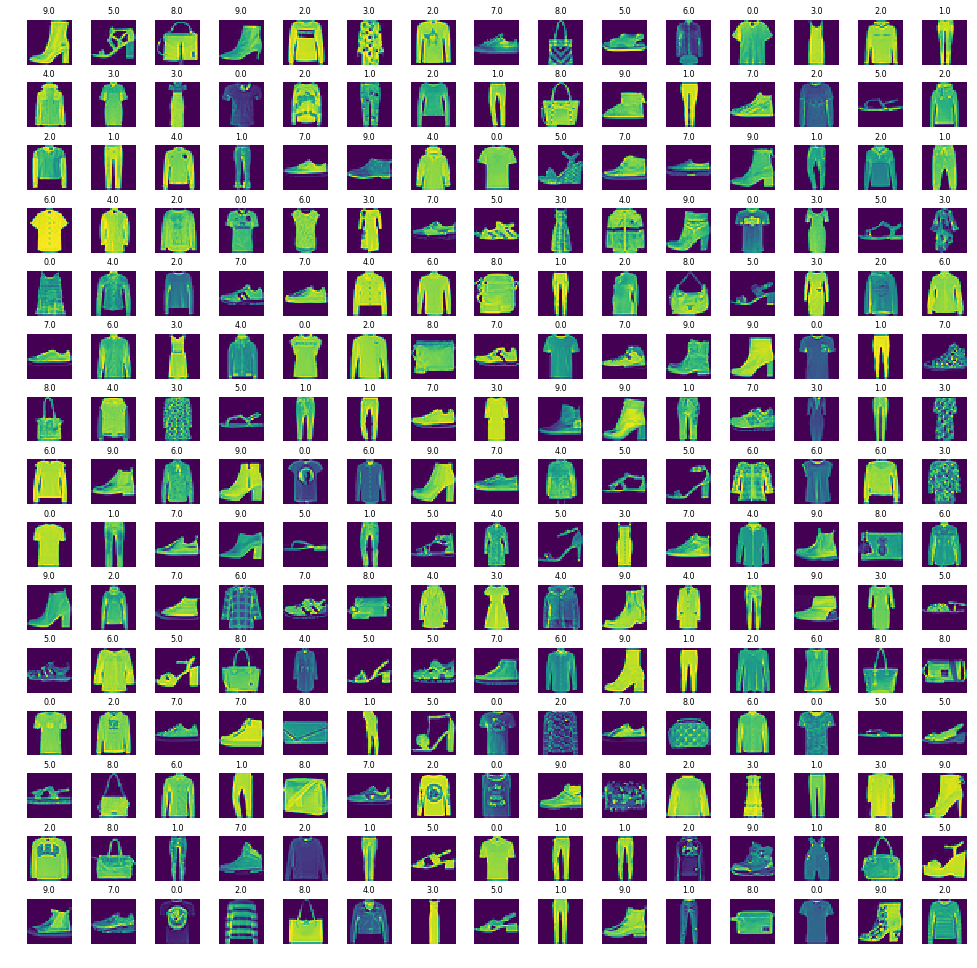

In [14]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# STEP #4: TRAINING THE MODEL

In [15]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [17]:
X_train.shape


(48000, 784)

In [18]:
y_train.shape

(48000,)

In [19]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

In [23]:
import keras 

Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model= Sequential()
cnn_model.add(Conv2D (64,3,3, input_shape=(28,28,1),activation='relu'))
cnn_model.add( MaxPooling2D (  pool_size=(2,2) ) )

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\phani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
C:\Users\phani\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
C:\Users\phani\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if __name__ == '__main__':


In [26]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [27]:
epochs=50
history = cnn_model.fit(X_train,y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(X_validate,y_validate))

C:\Users\phani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 172s 4ms/step - loss: 1.1554 - acc: 0.4714 - val_loss: 0.5208 - val_acc: 0.8166
Epoch 2/50
48000/48000 [==============================] - 156s 3ms/step - loss: 0.4728 - acc: 0.8330 - val_loss: 0.4258 - val_acc: 0.8504
Epoch 3/50
48000/48000 [==============================] - 148s 3ms/step - loss: 0.4098 - acc: 0.8547 - val_loss: 0.3782 - val_acc: 0.8707
Epoch 4/50
48000/48000 [==============================] - 156s 3ms/step - loss: 0.3762 - acc: 0.8672 - val_loss: 0.3653 - val_acc: 0.8685
Epoch 5/50
48000/48000 [==============================] - 135s 3ms/step - loss: 0.3541 - acc: 0.8756 - val_loss: 0.3361 - val_acc: 0.8868
Epoch 6/50
48000/48000 [==============================] - 143s 3ms/step - loss: 0.3381 - acc: 0.8809 - val_loss: 0.3414 - val_acc: 0.8790
Epoch 7/50
48000/48000 [==============================] - 143s 3ms/step - loss: 0.3292 - acc: 0.8831 - val_loss: 0.3143 - 

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 18s 2ms/step
Test Accuracy : 0.917


In [29]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


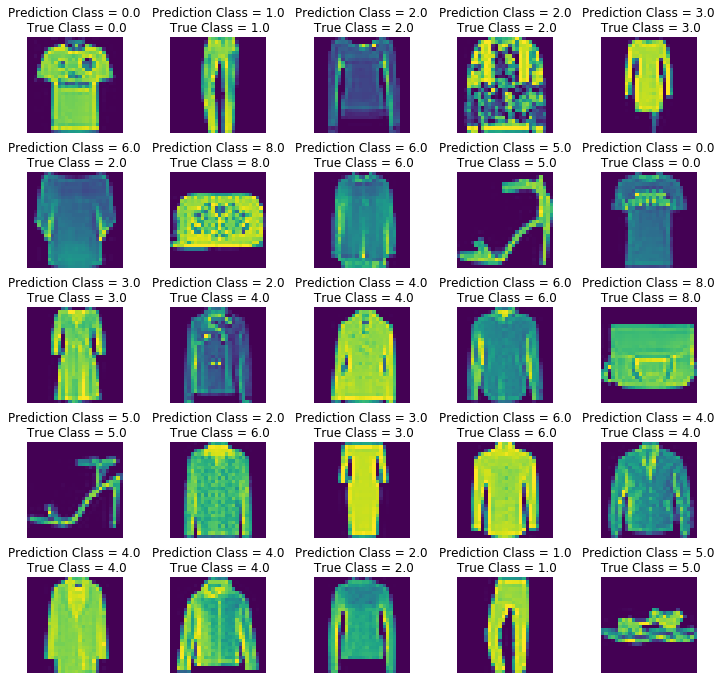

In [30]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


[[864   1  22  22   0   0  82   0   9   0]
 [  1 990   1   7   0   0   1   0   0   0]
 [ 12   1 909  12  30   0  35   0   1   0]
 [ 14   7   7 937  17   0  17   0   1   0]
 [  1   0  76  22 854   0  47   0   0   0]
 [  1   1   0   0   0 970   0  19   2   7]
 [113   2  67  29  44   0 740   0   5   0]
 [  0   0   0   0   0   5   0 983   0  12]
 [  4   1   7   2   1   1   4   2 978   0]
 [  0   0   0   0   0   5   0  50   0 945]]


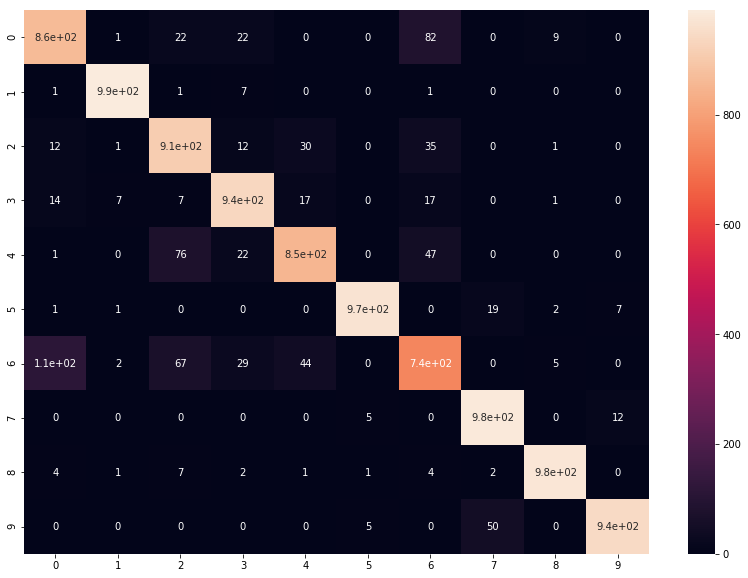

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
print(cm)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [32]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.86      0.86      0.86      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.83      0.91      0.87      1000
    Class 3       0.91      0.94      0.92      1000
    Class 4       0.90      0.85      0.88      1000
    Class 5       0.99      0.97      0.98      1000
    Class 6       0.80      0.74      0.77      1000
    Class 7       0.93      0.98      0.96      1000
    Class 8       0.98      0.98      0.98      1000
    Class 9       0.98      0.94      0.96      1000

avg / total       0.92      0.92      0.92     10000



- with increase in  no.of conv feature detector i.e kernels  &  introducing  drop out   helps to increase in accuracy 
- the   training  data set accuracy is 94.51 percentage  
- the  testing data set accuracy is  91.7 percentage 
-  while coming to individual classes clasification report :

    -   Class 0    => T-shirt/top =>    0.86      
    -   Class 1    => Trouser     =>    0.99     
    -   Class 2    => Pullover    =>    0.83     
    -   Class 3    => Dress       =>    0.91     
    -   Class 4    => Coat        =>    0.90    
    -   Class 5    => Sandal      =>    0.99    
    -   Class 6    => Shirt       =>    0.80     
    -   Class 7    => Sneaker     =>    0.93    
    -   Class 8    => Bag         =>    0.98     
    -   Class 9    => Ankle boot  =>    0.98     
